In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import joblib   # to save model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df = pd.read_csv("C:\\Users\\FELCIA.A\\Downloads\\house price prediction\\house_prices_dataset.csv")  
print(df.shape)
print(df.head())
print(df.info())


(10000, 5)
   square_feet  num_rooms  age  distance_to_city(km)          price
0  2248.357077          3   92             22.997972  200374.090410
1  1930.867849          2   22             13.984254  268784.847337
2  2323.844269          6   33             21.500945  315020.857676
3  2761.514928          3   63             10.343638  355111.468459
4  1882.923313          7   54             25.485200  234197.123903
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB
None


In [3]:
# Missing values
print(df.isnull().sum())

# Simple approach: drop rows with missing values (or you can impute)
df = df.dropna()


square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64


In [4]:
X = df[['square_feet','num_rooms','age','distance_to_city(km)']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('lr', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [6]:
def print_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.3f}")

print("Baseline Linear Regression performance on test set:")
print_metrics(y_test, y_pred)


Baseline Linear Regression performance on test set:
MSE: 386443817.46
RMSE: 19658.17
MAE: 15596.12
R2: 0.960


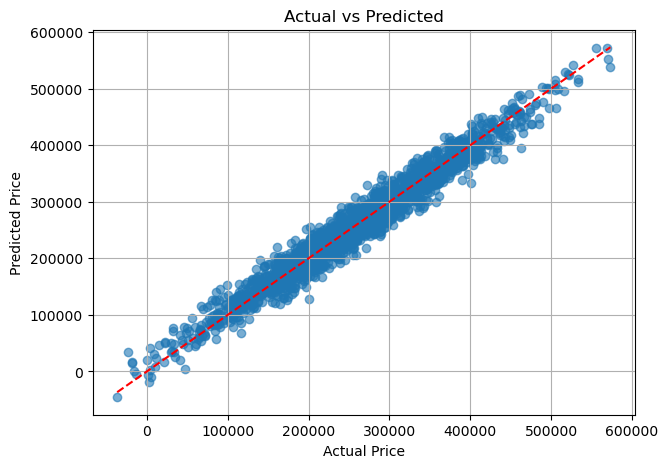

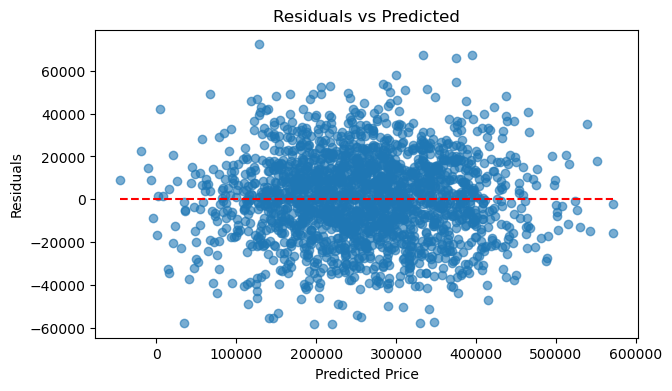

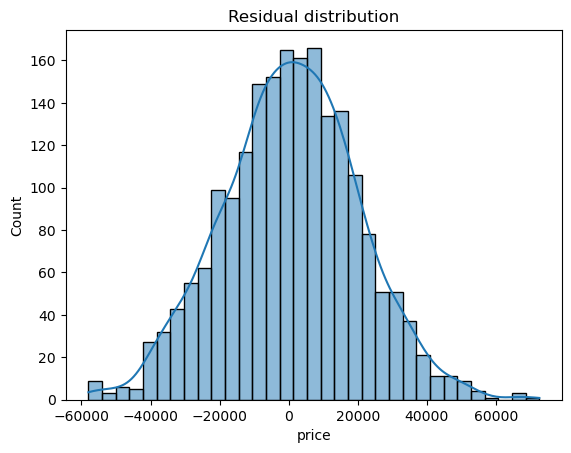

In [7]:
# Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Residual distribution
sns.histplot(residuals, kde=True)
plt.title("Residual distribution")
plt.show()
